In [2]:
import pandas as pd

In [5]:
# checking the data structure

filename = 'housing.csv'
df = pd.read_csv(filename)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


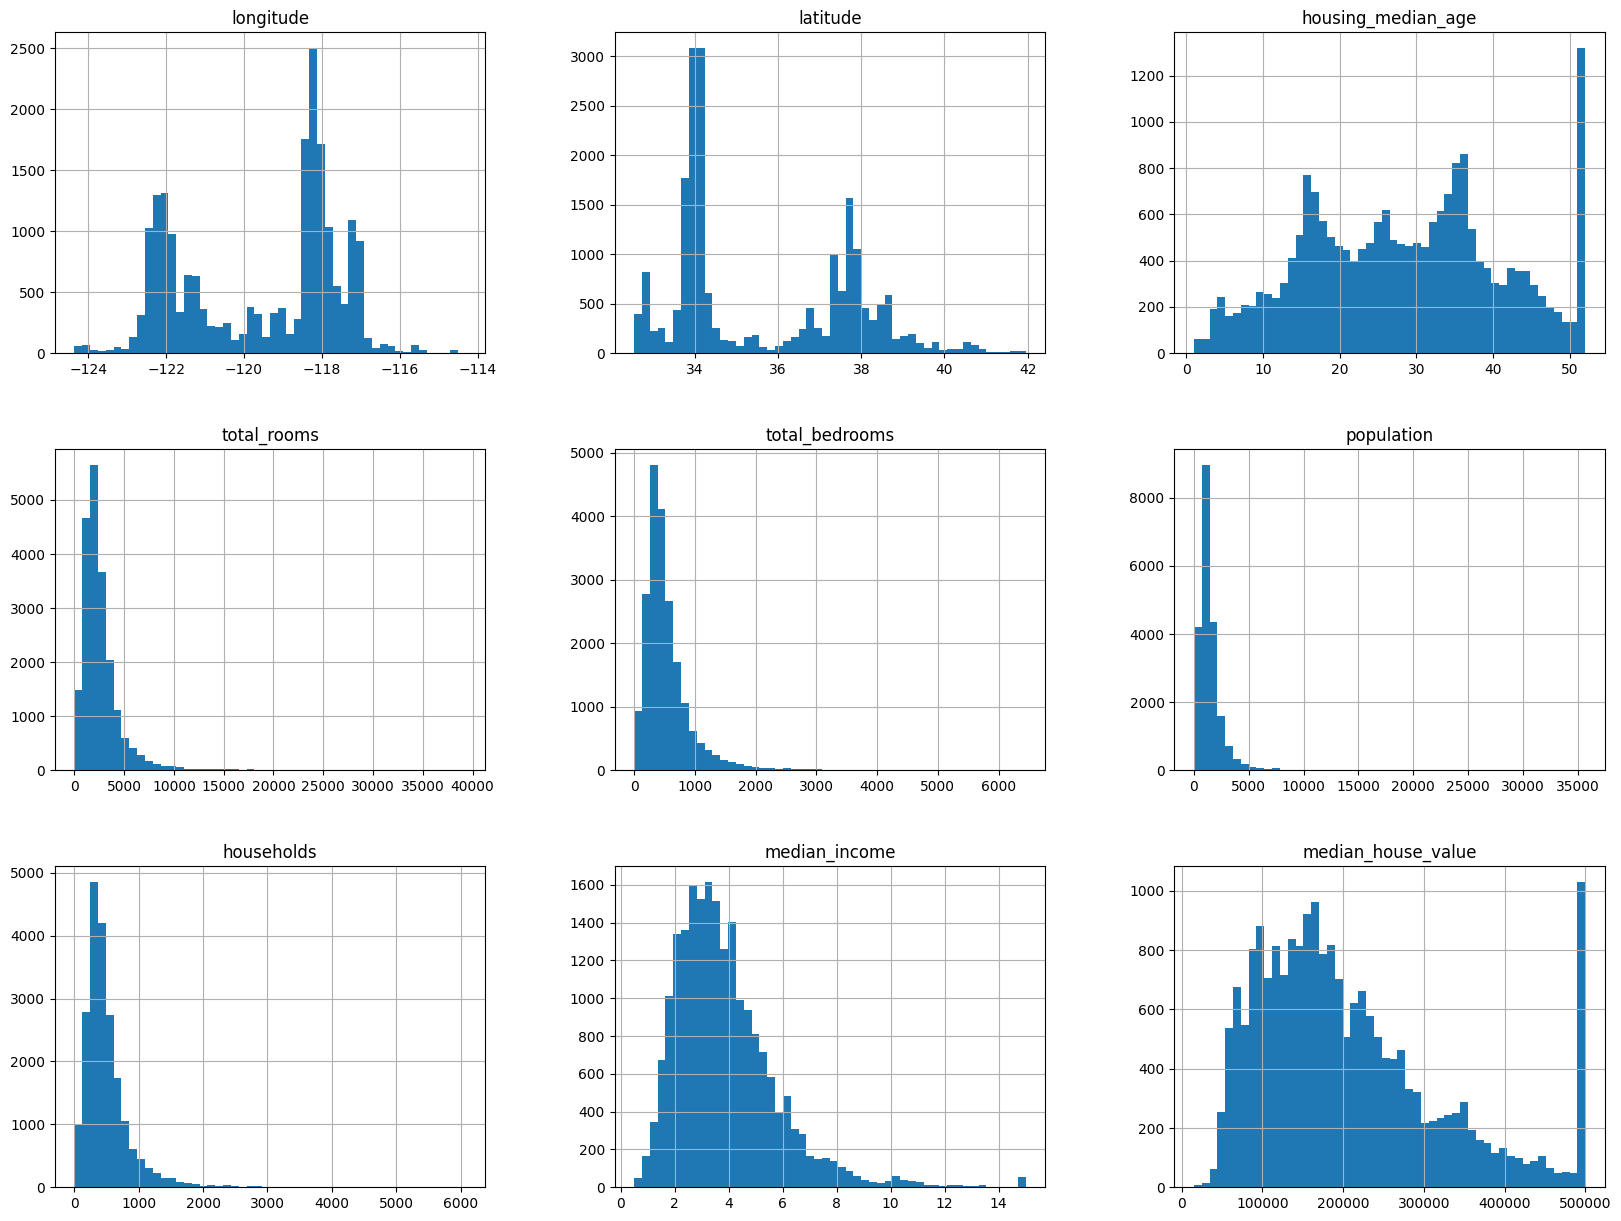

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#Creating a test set

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)
len(train_set)

16512

In [9]:
len(test_set)

4128

In [10]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


<Axes: >

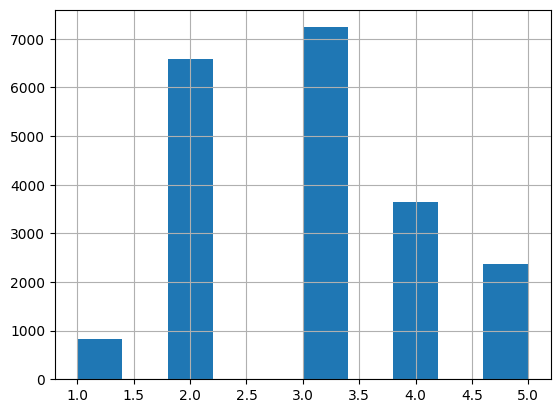

In [11]:
#Creating an income category attribute for stratified sampling

import pandas as pd

df["income_cat"] = pd.cut(df["median_income"],
                         bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                         labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()

In [12]:
# stratified sampling based on the income category

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [14]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
    

In [16]:
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

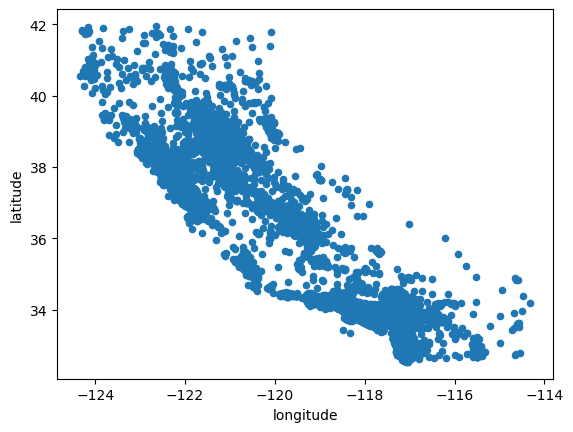

In [36]:
df.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

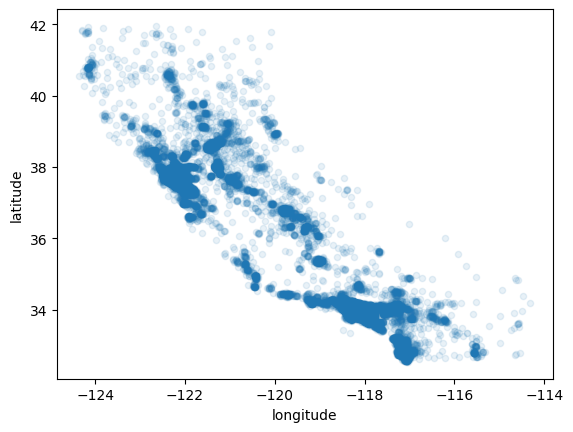

In [17]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

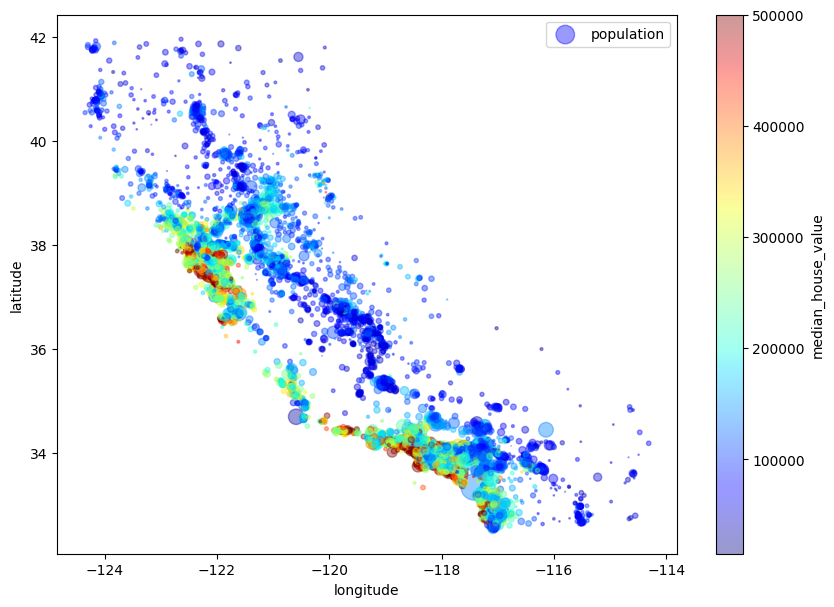

In [18]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
       s=df['population']/100, label='population', figsize=(10,7),
       c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
       )
plt.legend()

In [43]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/var/folders/1f/z0gqys9974l87919sjvm3jvw0000gn/T/ipykernel_74063/1186260766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

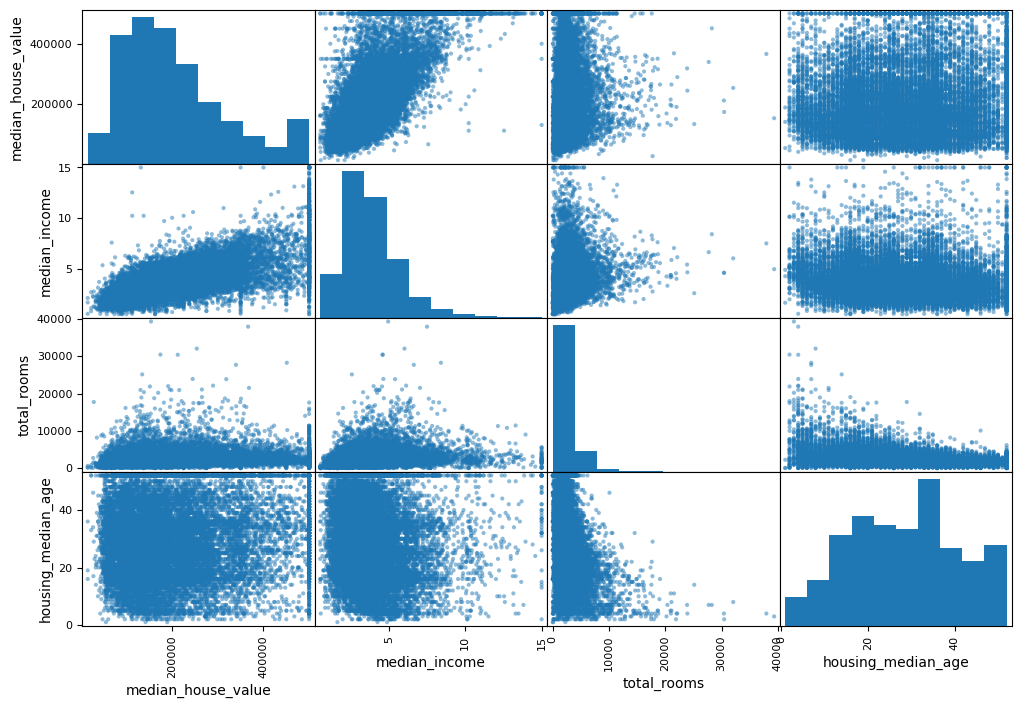

In [45]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

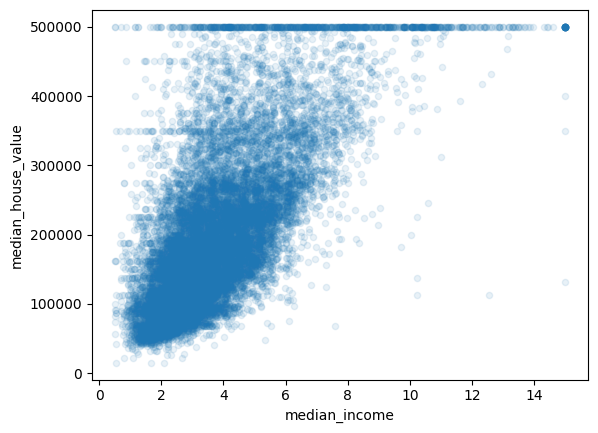

In [20]:
df.plot(kind='scatter', x='median_income', y='median_house_value',
       alpha=0.1)

In [21]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [49]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

/var/folders/1f/z0gqys9974l87919sjvm3jvw0000gn/T/ipykernel_74063/1186260766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [22]:
df = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='median')

In [25]:
housing_num = df.drop('ocean_proximity', axis=1)

In [26]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
X = imputer.transform(housing_num)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [30]:
housing_cat = df[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [37]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
#Create a small transformer class that adds the combined attributes

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [56]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df.values)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [102]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(df)

In [63]:
# training a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [65]:
# trying the model on a few instances from the training set

some_data = df.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 85749.86374743 305433.2153269  152019.84439021 185977.83516103
 244556.65849285]


In [66]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [67]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68634.00056099873

In [69]:
# Trying a DescionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [72]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70097.44213239 68261.85145335 68797.50525572 72445.53772039
 71384.6936347  74875.31337776 74081.31087119 73260.11018246
 69222.46785549 72404.94889431]
Mean: 71483.11813777636
Standard deviation: 2186.7948881324915


In [75]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71747.47345836 64119.2533148  67651.45880458 68664.27200399
 67420.92576712 72534.71844609 74019.63215464 68820.88568643
 66445.90842704 70143.35199184]
Mean: 69156.78800548989
Standard deviation: 2847.856858016587


In [76]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [77]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housing_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

18365.507982038824

In [81]:
display_scores(forest_reg_rmse_scores)

Scores: [50195.76937841 47769.95571092 46331.87705561 50591.09172022
 46761.76982293 50163.90997685 50460.48790865 49497.32193913
 46851.88876382 53752.56903453]
Mean: 49237.6641311062
Standard deviation: 2190.3080374456845


In [ ]:
from sklearn.externals import joblib

joblib.dump(my_model, "my_model.pkl")

In [85]:
# Searching the best combination of hyperparameter values for RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, 
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                          
                          )
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [92]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [95]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                     max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=30, n_jobs=None, oob_score=False, random_state=None,
                     verbose=0, warm_start=False)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


/var/folders/1f/z0gqys9974l87919sjvm3jvw0000gn/T/ipykernel_34763/500536424.py:10: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(mean_score), params)


In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.74242143e-02, 6.85845096e-02, 4.16333400e-02, 1.44094455e-02,
       1.44303382e-02, 1.55407569e-02, 1.51346218e-02, 3.59529803e-01,
       3.76305083e-02, 1.34816285e-01, 5.35318047e-02, 7.83620354e-03,
       1.51184037e-01, 3.21941338e-05, 3.23325037e-03, 5.04868750e-03])

In [99]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35952980290362674, 'median_income'),
 (0.1511840371752602, 'INLAND'),
 (0.13481628492680922, 'pop_per_hhold'),
 (0.0774242143415905, 'longitude'),
 (0.06858450962899491, 'latitude'),
 (0.05353180465541831, 'bedrooms_per_room'),
 (0.041633340014533254, 'housing_median_age'),
 (0.03763050828995244, 'rooms_per_hhold'),
 (0.015540756927347266, 'population'),
 (0.015134621849496077, 'households'),
 (0.014430338212422606, 'total_bedrooms'),
 (0.014409445530727517, 'total_rooms'),
 (0.007836203541078671, '<1H OCEAN'),
 (0.005048687498973382, 'NEAR OCEAN'),
 (0.0032332503699886044, 'NEAR BAY'),
 (3.219413378040867e-05, 'ISLAND')]

In [105]:
# Evaluating the final model on the test set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [106]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)
                        ))


array([45732.53240253, 49601.33307676])

In [ ]:
import sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [ ]:
param_distribs = {

    'kernal': ['linear', 'rbf'],
    'C': reciprocal(20, 20000),
    'gamma': expon(scale=1.0)
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)